# Data preprocessing
- Imported Data from CSV
- Removed irrelavant data(NAN)
- Plotted ax and ay wrt time

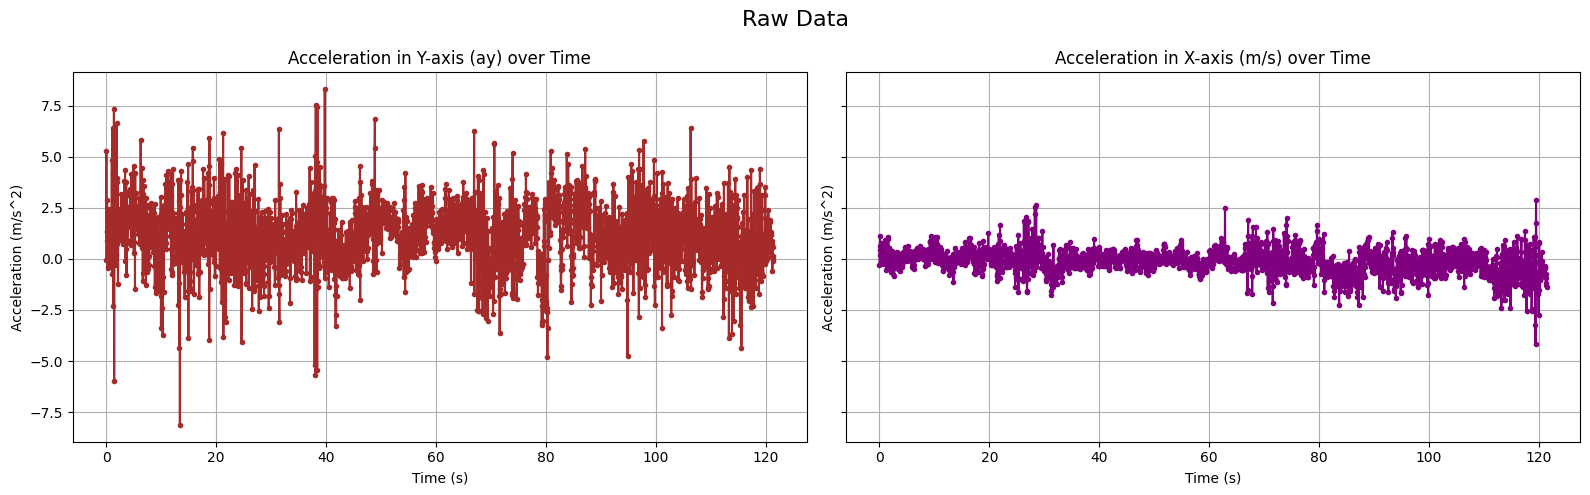

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv('data5.csv')
# print(df.to_string())
df = df.dropna()
# print(df.to_string())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
fig.suptitle('Raw Data', fontsize=16)
ax1.plot(df['time'], df['ay'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Acceleration in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Acceleration (m/s^2)') 
ax1.grid(True)

ax2.plot(df['time'], df['ax'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Acceleration in X-axis (m/s) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Acceleration (m/s^2)') 
ax2.grid(True)

plt.tight_layout() 
plt.show()


# DC Bias Removal(Sensor Calibration)

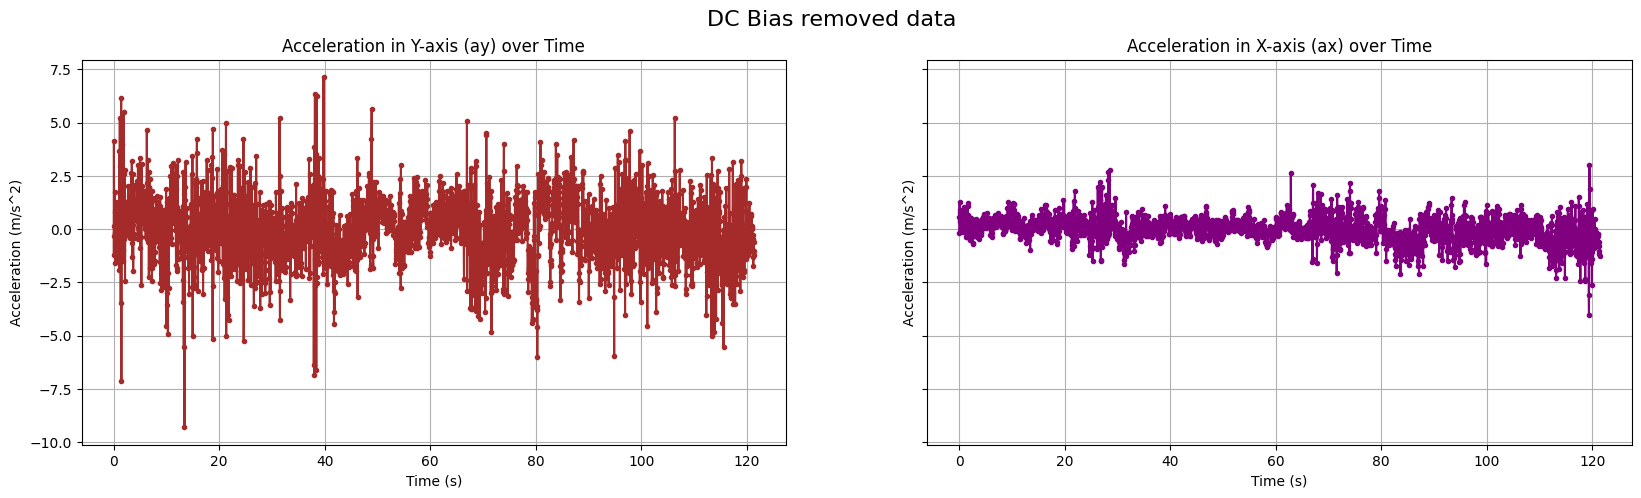

In [64]:
df['ay_bias'] = df['ay'].copy()  # Make a copy of ay
df['ax_bias'] = df['ax'].copy()  # Make a copy of ax

ay_mean = df['ay_bias'].mean()
ax_mean = df['ax_bias'].mean()

for i in range (0,len(df)):
    df.loc[i, 'ay_bias'] = df.loc[i, 'ay_bias'] - ay_mean
    df.loc[i, 'ax_bias'] = df.loc[i, 'ax_bias'] - ax_mean

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('DC Bias removed data', fontsize=16)
ax1.plot(df['time'], df['ay_bias'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Acceleration in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Acceleration (m/s^2)') 
ax1.grid(True)

ax2.plot(df['time'], df['ax_bias'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Acceleration in X-axis (ax) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Acceleration (m/s^2)') 
ax2.grid(True)



# Exponential Moving Average Filter

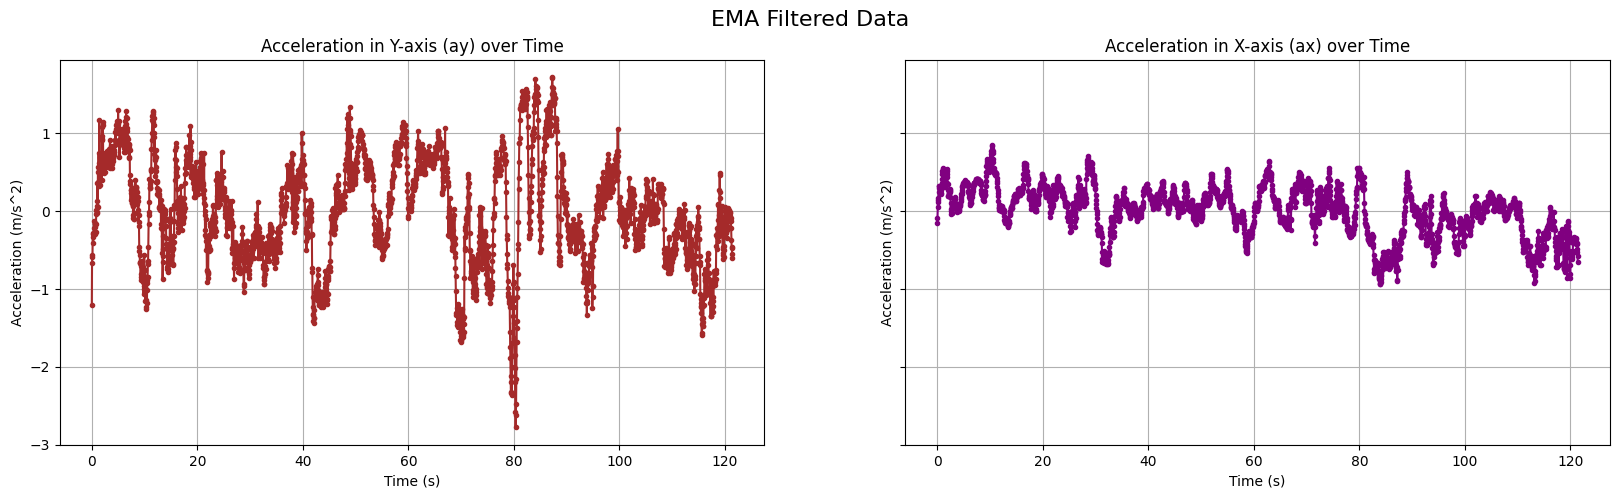

In [65]:
df['ay_ema'] = df['ay_bias'].copy()  # Make a copy of dc bias removed ay
df['ax_ema'] = df['ax_bias'].copy()  # Make a copy of dc bias removed ax

# Apply EMA filter
for i in range(1, len(df)):
    df.loc[i, 'ay_ema'] = df.loc[i - 1, 'ay_ema'] * 0.9 + df.loc[i, 'ay_bias'] * 0.1
    df.loc[i, 'ax_ema'] = df.loc[i - 1, 'ax_ema'] * 0.9 + df.loc[i, 'ax_bias'] * 0.1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('EMA Filtered Data', fontsize=16)
ax1.plot(df['time'], df['ay_ema'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Acceleration in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Acceleration (m/s^2)') 
ax1.grid(True)

ax2.plot(df['time'], df['ax_ema'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Acceleration in X-axis (ax) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Acceleration (m/s^2)') 
ax2.grid(True)

# Velocity Estimation

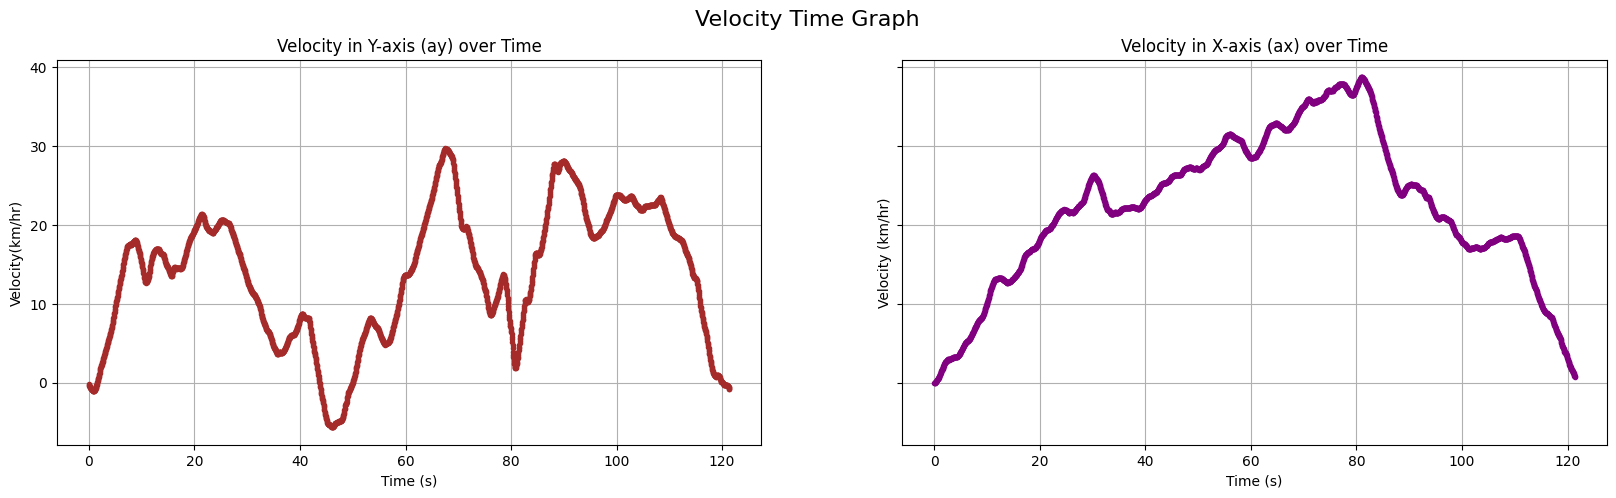

In [66]:
df['vy'] = df['ay_ema'].copy()  # Copy ay for Velocity estimation
df['vx'] = df['ax_ema'].copy()  # Copy ax for Velocity estimation

for i in range(1,len(df)):
    df.loc[i, 'vy'] = (df.loc[i - 1, 'vy'] + df.loc[i, 'ay_ema'] ) 
    df.loc[i, 'vx'] = (df.loc[i - 1, 'vx'] + df.loc[i, 'ax_ema'] ) 

df['vy'] = df['vy'] /23  # Divide by 23 since 23 samples/s
df['vx'] = df['vx'] /23 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Velocity Time Graph', fontsize=16)
ax1.plot(df['time'], df['vy']*18/5, marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Velocity in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Velocity(km/hr)') 
ax1.grid(True)

ax2.plot(df['time'], df['vx']*18/5, marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Velocity in X-axis (ax) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Velocity (km/hr)') 
ax2.grid(True)


# Distance Estimation

Distance travelled in X-axis: 755.6411739736285
Distance travelled in Y-axis: 466.07429870562476
Net Distance: 887.8168931250314
         time      ax       ay       az       yaw   ay_bias  ax_bias    ay_ema    ax_ema        vy         vx          sy          sx
0       0.000 -0.2890 -0.02915  10.3834  269.9347 -1.205155 -0.16087 -1.205155 -0.160870 -0.052398  -0.006994   -0.002278   -0.000304
1       0.043  0.4340  5.29738   5.4597  269.4476  4.121375  0.56213 -0.672502 -0.088570 -0.081637  -0.010845   -0.005828   -0.000776
2       0.086  1.1439  1.32979   8.4405  268.9149  0.153785  1.27203 -0.589873  0.047490 -0.107284  -0.008780   -0.010492   -0.001157
3       0.129  0.6160  0.85976  15.0617  268.3628 -0.316245  0.74413 -0.562511  0.117154 -0.131741  -0.003687   -0.016220   -0.001318
4       0.172  0.1970  2.90081  16.4443  267.7665  1.724805  0.32513 -0.333779  0.137952 -0.146253   0.002311   -0.022579   -0.001217
5       0.215  0.2963  1.34959  11.2693  267.1913  0.173585  0.4244

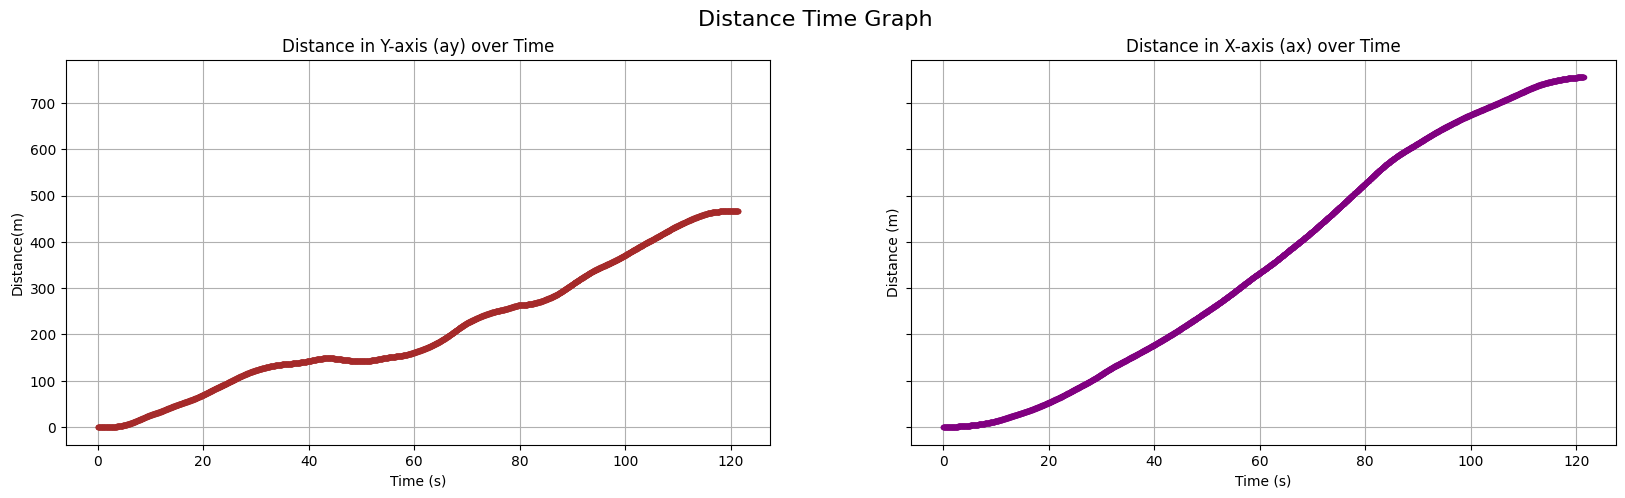

In [67]:
df['sy'] = df['vy'].copy()  # Copy ay for Velocity estimation
df['sx'] = df['vx'].copy()  # Copy ax for Velocity estimation

for i in range(1,len(df)):
    df.loc[i, 'sy'] = (df.loc[i - 1, 'sy'] + df.loc[i, 'vy'] )
    df.loc[i, 'sx'] = (df.loc[i - 1, 'sx'] + df.loc[i, 'vx']) 

df['sy'] = df['sy'] /23  # Divide by 23 since 23 samples/s
df['sx'] = df['sx'] /23 

dx = df['sx'].iloc[-1]
dy = df['sy'].iloc[-1]
distance = math.sqrt(dx**2 + dy**2)
print('Distance travelled in X-axis:',dx)
print('Distance travelled in Y-axis:',dy)
print('Net Distance:',distance)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Distance Time Graph', fontsize=16)
ax1.plot(df['time'], df['sy'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Distance in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Distance(m)') 
ax1.grid(True)

ax2.plot(df['time'], df['sx'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Distance in X-axis (ax) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Distance (m)') 
ax2.grid(True)
print(df.to_string())

# Converting Distances to Global frame of reference(NWU)

In [68]:
df['Dn'] = df['sx'] * np.cos(np.radians(df['yaw'])) - df['sy'] * np.sin(np.radians(df['yaw']))
df['Dw'] = -df['sx'] * np.sin(np.radians(df['yaw'])) - df['sy'] * np.cos(np.radians(df['yaw']))

df['distance'] = np.sqrt(df['Dn']**2 + df['Dw']**2)
print(df.to_string())


         time      ax       ay       az       yaw   ay_bias  ax_bias    ay_ema    ax_ema        vy         vx          sy          sx          Dn          Dw    distance
0       0.000 -0.2890 -0.02915  10.3834  269.9347 -1.205155 -0.16087 -1.205155 -0.160870 -0.052398  -0.006994   -0.002278   -0.000304   -0.002278   -0.000307    0.002298
1       0.043  0.4340  5.29738   5.4597  269.4476  4.121375  0.56213 -0.672502 -0.088570 -0.081637  -0.010845   -0.005828   -0.000776   -0.005820   -0.000832    0.005879
2       0.086  1.1439  1.32979   8.4405  268.9149  0.153785  1.27203 -0.589873  0.047490 -0.107284  -0.008780   -0.010492   -0.001157   -0.010468   -0.001356    0.010556
3       0.129  0.6160  0.85976  15.0617  268.3628 -0.316245  0.74413 -0.562511  0.117154 -0.131741  -0.003687   -0.016220   -0.001318   -0.016176   -0.001781    0.016273
4       0.172  0.1970  2.90081  16.4443  267.7665  1.724805  0.32513 -0.333779  0.137952 -0.146253   0.002311   -0.022579   -0.001217   -0.022514   -0

# Latitude and Longitude Calculation

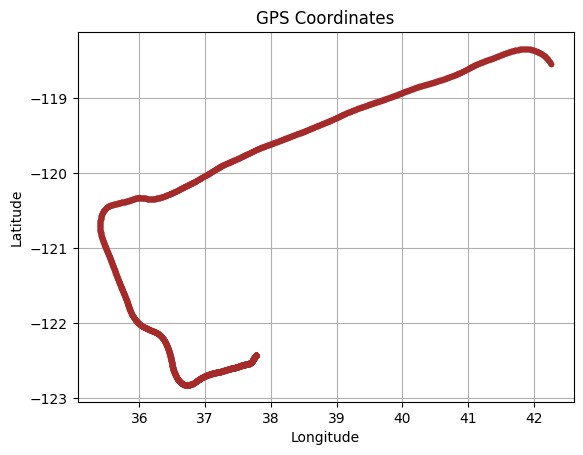

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df, initial_lat, initial_lon are already defined
initial_lat = 37.7749
initial_lon = -122.4194

# Set initial coordinates
df.loc[0, 'lat'] = initial_lat
df.loc[0, 'lon'] = initial_lon

# Function to convert distance and heading to new coordinates
def convert_distance_to_coordinates(lat1, lon1, distance, heading):
    # Convert degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    heading_rad = np.radians(heading)

    # Convert distance to radians
    delta = distance / 6371000  # Earth's radius in meters

    # Calculate final latitude and longitude
    lat2_rad = np.arcsin(np.sin(lat1_rad) * np.cos(delta) + np.cos(lat1_rad) * np.sin(delta) * np.cos(heading_rad))
    lon2_rad = lon1_rad + np.arctan2(np.sin(heading_rad) * np.sin(delta) * np.cos(lat1_rad),
                                      np.cos(delta) - np.sin(lat1_rad) * np.sin(lat2_rad))

    # Convert radians back to degrees
    lat2 = np.degrees(lat2_rad)
    lon2 = np.degrees(lon2_rad)

    return lat2, lon2

# Loop to calculate and update coordinates
for i in range(1, len(df)):
    lat, lon = convert_distance_to_coordinates(df.loc[i - 1, 'lat'], df.loc[i - 1, 'lon'], df.loc[i, 'distance'], df.loc[i, 'yaw'])
    df.loc[i, 'lat'] = lat
    df.loc[i, 'lon'] = lon

# Plotting the path
plt.plot(df['lat'], df['lon'], marker='o', linestyle='-', color='brown', markersize=3)
plt.title('GPS Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
